In [1]:
def getInput():
    return open("../input/day_10.txt").read()

In [50]:
test1 = """
-L|F7
7S-7|
L|7||
-L-J|
L|-JF
""".strip()

test12 = """
-L|F7
7S-7|
L|7||
-L-J|
""".strip()

test2 = """
7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ
""".strip()

text = getInput().strip()

# Day 10 Part 1

In [72]:
import numpy as np

## Constants

In [95]:
CONNECTS_NORTH = 1 << 0
CONNECTS_EAST = 1 << 1
CONNECTS_SOUTH = 1 << 2
CONNECTS_WEST = 1 << 3

PIPE_TILES = {
    "|": CONNECTS_NORTH | CONNECTS_SOUTH,
    "-": CONNECTS_EAST | CONNECTS_WEST,
    "L": CONNECTS_NORTH | CONNECTS_EAST,
    "J": CONNECTS_NORTH | CONNECTS_WEST,
    "7": CONNECTS_SOUTH | CONNECTS_WEST,
    "F": CONNECTS_EAST | CONNECTS_SOUTH,
    ".": 0,
    "S": -1,
}

PIPE_TILES_INVERTED = { v:k for k,v in PIPE_TILES.items() }

## Functions

In [120]:
def parse_input(i:str) -> tuple[np.ndarray, tuple[int, int]]:
    """Parse the string matrix into a connectivity matrix"""
    lines = i.split("\n")
    cols = len(lines[0])
    rows = len(lines)
    matrix = np.ndarray((rows, cols), dtype=np.int8)
    start_position = None
    for y in range(rows):
        for x in range(cols):
            val = PIPE_TILES[lines[y][x]]
            matrix[y][x] = val
            if val < 0: start_position = (y,x)
    return matrix, start_position

def dir_to_str(dir:int):
    if dir == CONNECTS_NORTH: return "North"
    if dir == CONNECTS_EAST: return "East"
    if dir == CONNECTS_SOUTH: return "South"
    if dir == CONNECTS_WEST: return "West"
    return "NaD"

def check_connection(current_tile:int, adjacent_tile:int, side_to_connect:int) -> bool:
    """Check if current_tile connects to adjacent_tile on the side_to_connect"""
    curr_has_connection = (current_tile & side_to_connect) > 0
    adja_has_connection = False
    if side_to_connect == CONNECTS_NORTH:
        adja_has_connection = (adjacent_tile & CONNECTS_SOUTH) > 0
    elif side_to_connect == CONNECTS_EAST:
        adja_has_connection = (adjacent_tile & CONNECTS_WEST) > 0
    elif side_to_connect == CONNECTS_SOUTH:
        adja_has_connection = (adjacent_tile & CONNECTS_NORTH) > 0
    elif side_to_connect == CONNECTS_WEST:
        adja_has_connection = (adjacent_tile & CONNECTS_EAST) > 0
    return curr_has_connection and adja_has_connection

def collapse_start(matrix:np.ndarray, start_position:tuple[int, int]):
    """This works on the *manually verified* assumption that the starting point can only connects to two tiles (in the test cases and the input)"""
    rows, cols = matrix.shape
    sr, sc = start_position
    connections = 0
    if sr > 0 and (matrix[sr-1][sc] & CONNECTS_SOUTH) > 0: # check north
        connections |= CONNECTS_NORTH
    if sc < cols - 1 and (matrix[sr][sc+1] & CONNECTS_WEST) > 0: # check east
        connections |= CONNECTS_EAST
    if sr < rows - 1 and (matrix[sr+1][sc] & CONNECTS_NORTH) > 0: # check south
        connections |= CONNECTS_SOUTH
    if sc > 0 and (matrix[sr][sc-1] & CONNECTS_EAST) > 0: # connect west
        connections |= CONNECTS_WEST
    return connections

def get_coordinates_for_side(current_coords:tuple[int,int], side:int) -> tuple[int,int]:
    row, col = current_coords
    if side == CONNECTS_NORTH: return (row - 1, col)
    if side == CONNECTS_EAST: return (row, col + 1)
    if side == CONNECTS_SOUTH: return (row + 1, col)
    if side == CONNECTS_WEST: return (row, col -1)
    return (-1, -1)


def walk_loop(start_collapsed_matrix:np.ndarray, start_position:tuple[int, int]) -> int:
    """Start walking the loop and return its length"""
    rows, cols = start_collapsed_matrix.shape
    def is_valid_tile(rowcol:tuple[int, int]) -> bool:
        row, col = rowcol
        return not (row < 0 or col < 0 or row >= rows or col >= cols)
    
    curr_row, curr_col = start_position
    loop_length = 0

    sides = [CONNECTS_NORTH, CONNECTS_EAST, CONNECTS_SOUTH, CONNECTS_WEST]

    came_from_side_idx = -1
    while loop_length <= 0 or (curr_row, curr_col) != start_position:
        # Find next direction (side to move to)
        curr_side_idx = 0
        while True:
            side = sides[curr_side_idx]
            (att_row, att_col) = get_coordinates_for_side((curr_row, curr_col), side)
            valid = is_valid_tile((att_row, att_col))
            walk_back = curr_side_idx == came_from_side_idx
            if valid and (not walk_back) and check_connection( start_collapsed_matrix[curr_row][curr_col], start_collapsed_matrix[att_row][att_col], side):
                break 
            curr_side_idx = (curr_side_idx + 1) % 4
        # print(f"Arrived from the {dir_to_str(sides[came_from_side_idx])} to {(curr_row, curr_col)} ({PIPE_TILES_INVERTED[start_collapsed_matrix[curr_row][curr_col]]}), took a step {dir_to_str(side)}")
        curr_row, curr_col = get_coordinates_for_side((curr_row, curr_col), side)
        came_from_side_idx = (curr_side_idx + 2) % 4
        # Count step
        loop_length += 1
    return loop_length
    
    

## Execution

In [114]:
matrix, (srow, scol) = parse_input(text)
s = collapse_start(matrix, (srow, scol))
matrix[srow][scol] = s
loop_length = walk_loop(matrix, (srow, scol))
print("Loop length:", loop_length, "->", loop_length // 2)

Loop length: 13394 -> 6697


# Day 10 Part 2

In [115]:
import numpy as np

## Constants

In [118]:
CONNECTS_NORTH = 1 << 0
CONNECTS_EAST = 1 << 1
CONNECTS_SOUTH = 1 << 2
CONNECTS_WEST = 1 << 3

PIPE_TILES = {
    "|": CONNECTS_NORTH | CONNECTS_SOUTH,
    "-": CONNECTS_EAST | CONNECTS_WEST,
    "L": CONNECTS_NORTH | CONNECTS_EAST,
    "J": CONNECTS_NORTH | CONNECTS_WEST,
    "7": CONNECTS_SOUTH | CONNECTS_WEST,
    "F": CONNECTS_EAST | CONNECTS_SOUTH,
    ".": 0,
    "S": -1,
}

PIPE_TILES_INVERTED = { v:k for k,v in PIPE_TILES.items() }

## Functions

In [217]:
def parse_input(i:str) -> tuple[np.ndarray, tuple[int, int]]:
    """Parse the string matrix into a connectivity matrix"""
    lines = i.split("\n")
    cols = len(lines[0])
    rows = len(lines)
    matrix = np.ndarray((rows, cols), dtype=np.int8)
    start_position = None
    for y in range(rows):
        for x in range(cols):
            val = PIPE_TILES[lines[y][x]]
            matrix[y][x] = val
            if val < 0: start_position = (y,x)
    return matrix, start_position

def dir_to_str(dir:int):
    if dir == CONNECTS_NORTH: return "North"
    if dir == CONNECTS_EAST: return "East"
    if dir == CONNECTS_SOUTH: return "South"
    if dir == CONNECTS_WEST: return "West"
    return "NaD"

def check_connection(current_tile:int, adjacent_tile:int, side_to_connect:int) -> bool:
    """Check if current_tile connects to adjacent_tile on the side_to_connect"""
    curr_has_connection = (current_tile & side_to_connect) > 0
    adja_has_connection = False
    if side_to_connect == CONNECTS_NORTH:
        adja_has_connection = (adjacent_tile & CONNECTS_SOUTH) > 0
    elif side_to_connect == CONNECTS_EAST:
        adja_has_connection = (adjacent_tile & CONNECTS_WEST) > 0
    elif side_to_connect == CONNECTS_SOUTH:
        adja_has_connection = (adjacent_tile & CONNECTS_NORTH) > 0
    elif side_to_connect == CONNECTS_WEST:
        adja_has_connection = (adjacent_tile & CONNECTS_EAST) > 0
    return curr_has_connection and adja_has_connection

def collapse_start(matrix:np.ndarray, start_position:tuple[int, int]):
    """This works on the *manually verified* assumption that the starting point can only connects to two tiles (in the test cases and the input)"""
    rows, cols = matrix.shape
    sr, sc = start_position
    connections = 0
    if sr > 0 and (matrix[sr-1][sc] & CONNECTS_SOUTH) > 0: # check north
        connections |= CONNECTS_NORTH
    if sc < cols - 1 and (matrix[sr][sc+1] & CONNECTS_WEST) > 0: # check east
        connections |= CONNECTS_EAST
    if sr < rows - 1 and (matrix[sr+1][sc] & CONNECTS_NORTH) > 0: # check south
        connections |= CONNECTS_SOUTH
    if sc > 0 and (matrix[sr][sc-1] & CONNECTS_EAST) > 0: # connect west
        connections |= CONNECTS_WEST
    return connections

def get_coordinates_for_side(current_coords:tuple[int,int], side:int) -> tuple[int,int]:
    row, col = current_coords
    if side == CONNECTS_NORTH: return (row - 1, col)
    if side == CONNECTS_EAST: return (row, col + 1)
    if side == CONNECTS_SOUTH: return (row + 1, col)
    if side == CONNECTS_WEST: return (row, col -1)
    return (-1, -1)


def walk_loop(start_collapsed_matrix:np.ndarray, start_position:tuple[int, int]) -> int:
    """Start walking the loop and return its length"""
    rows, cols = start_collapsed_matrix.shape
    def is_valid_tile(rowcol:tuple[int, int]) -> bool:
        row, col = rowcol
        return not (row < 0 or col < 0 or row >= rows or col >= cols)
    
    curr_row, curr_col = start_position
    loop_length = 0
    loop_map = np.zeros((rows, cols), dtype=np.int8)

    sides = [CONNECTS_NORTH, CONNECTS_EAST, CONNECTS_SOUTH, CONNECTS_WEST]

    came_from_side_idx = -1
    while loop_length <= 0 or (curr_row, curr_col) != start_position:
        # Mark position on map
        loop_map[curr_row][curr_col] = start_collapsed_matrix[curr_row][curr_col]
        # Find next direction (side to move to)
        curr_side_idx = 0
        while True:
            side = sides[curr_side_idx]
            (att_row, att_col) = get_coordinates_for_side((curr_row, curr_col), side)
            valid = is_valid_tile((att_row, att_col))
            walk_back = curr_side_idx == came_from_side_idx
            if valid and (not walk_back) and check_connection( start_collapsed_matrix[curr_row][curr_col], start_collapsed_matrix[att_row][att_col], side):
                break 
            curr_side_idx = (curr_side_idx + 1) % 4
        # print(f"Arrived from the {dir_to_str(sides[came_from_side_idx])} to {(curr_row, curr_col)} ({PIPE_TILES_INVERTED[start_collapsed_matrix[curr_row][curr_col]]}), took a step {dir_to_str(side)}")
        curr_row, curr_col = get_coordinates_for_side((curr_row, curr_col), side)
        came_from_side_idx = (curr_side_idx + 2) % 4
        # Count step
        loop_length += 1
    return loop_length, loop_map

def divide_regions(pipe_map:np.ndarray, loop_map:np.ndarray, region_values:tuple[int,int]=(-1,1)):
    rows, cols = pipe_map.shape
    region_map = np.zeros((rows, cols), dtype=np.int16)
    current_region = 0
    for y in range(rows):
        for x in range(cols):
            if loop_map[y][x] < 1:
                region_map[y][x] = region_values[current_region]
            elif (pipe_map[y][x] & CONNECTS_SOUTH) > 0:
                current_region = (current_region+1)%2
    return region_map
    

## Execution

In [227]:
matrix, (srow, scol) = parse_input(text)
s = collapse_start(matrix, (srow, scol))
matrix[srow][scol] = s
loop_length, loop_map = walk_loop(matrix, (srow, scol))
regions = divide_regions(matrix, loop_map)
np.where(regions > 0, 1, 0).sum().sum()


423

## Visualization

In [219]:
from PIL import Image

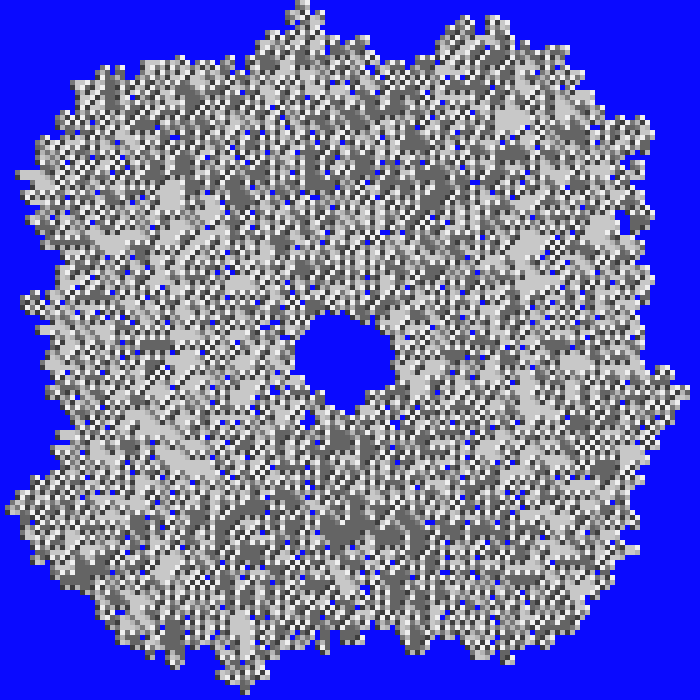

In [220]:
def get_color(i):
    v = matrix[i // matrix.shape[0]][i % matrix.shape[1]]
    l = loop_map[i // matrix.shape[0]][i % matrix.shape[1]]
    # return (10,20,30) if v == 0 else (55,155,255)
    return ((10,10,255) if l == 0 else (v*20,v*20,v*20))

img = Image.new("RGB", matrix.shape, (0,0,0))
img.putdata([
    get_color(i)
    for i in range(matrix.shape[0] * matrix.shape[1])
])
img.resize((matrix.shape[0]*5, matrix.shape[1]*5), Image.NEAREST)

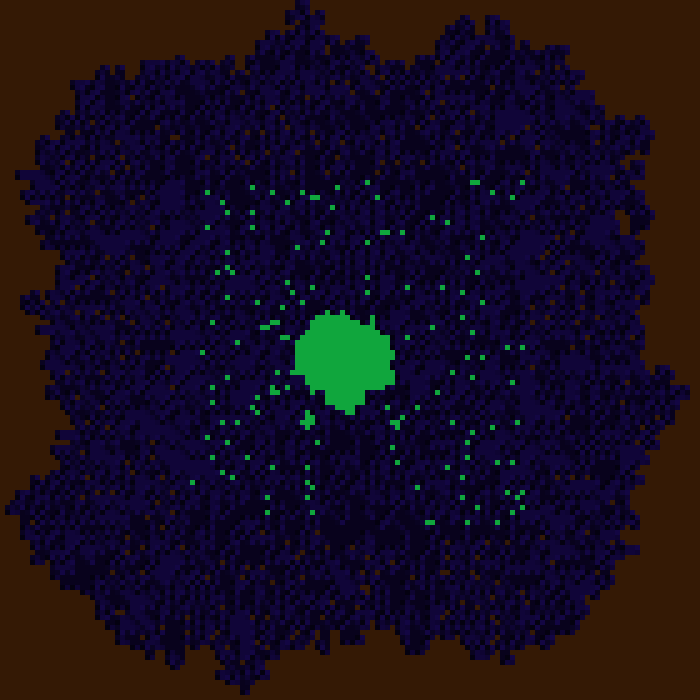

In [237]:
def get_color(i):
    v = regions[i // regions.shape[0]][i % regions.shape[1]]
    m = matrix[i // matrix.shape[0]][i % matrix.shape[1]] * 10
    m = m / 255
    # return (10,20,30) if v == 0 else (55,155,255)
    return (52,25,5) if v < 0 else ((int(m * 41),int(m * 14),int(m * 144)) ,(16,166,61))[v]

img = Image.new("RGB", matrix.shape, (0,0,0))
img.putdata([
    get_color(i)
    for i in range(matrix.shape[0] * matrix.shape[1])
])
img.resize((matrix.shape[0]*5, matrix.shape[1]*5), Image.NEAREST)